# Exploratory Data Analysis
## CFPB Complaints

The purpose of this project is to download and explore a dataset using Python and associated libraries.

The dataset is about consumer complaints about finacial products and services collected by the Consumer Financial Protection Bureau (CFPB). The data can be downloaded from the [data.gov](https://www.data.gov) website which hosts the U.S Government's open data.

### Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import json
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth',1000) # Show complete text in dataframe without truncating.

### Gather

Downloaded dataset manually as a csv file and saved it locally as the file is too large and is causing app to crash when I download automatically using the requests library. (should check this out to see why)

In [7]:
# Read csv file into Pandas DataFrame suing chunksize due to memory issue (csv file is ~ 450 Mb)

complaints_df = pd.read_csv('Consumer_Complaints.csv', index_col=0, parse_dates=['Date received', 'Date sent to company'],\
            infer_datetime_format=True)


,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Date received,,,,,,,,,,,,,,,,,
2014-03-12,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,2014-03-17,Closed with explanation,Yes,No,759217
2016-10-01,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,2016-10-05,Closed with explanation,Yes,No,2141773
2016-10-17,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,"I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook on XXXX XXXX. I noticed that Citizens bank had taken the automatic payment out of my checking account at XXXX XXXX XXXX Bank. I called Citizens and they stated that they did not close the loan until XXXX XXXX. ( stating that they did not receive the check until XXXX. XXXX. ). I told them that I did not believe that the check took that long to arrive. XXXX told me a check was issued to me for the amount overpaid, they deducted additional interest. Today ( XXXX XXXX, ) I called Citizens Bank again and talked to a supervisor named XXXX, because on XXXX XXXX. I received a letter that the loan had been paid in full ( dated XXXX, XXXX ) but no refund check was included. XXXX stated that they hold any over payment for 10 business days after the loan was satisfied and that my check would be maile...",NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,2016-10-20,Closed with explanation,Yes,No,2163100
2014-06-08,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,2014-06-10,Closed with explanation,Yes,Yes,885638
2014-09-13,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,2014-09-13,Closed with explanation,Yes,Yes,1027760
2013-11-13,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,U.S. BANCORP,MN,48322,NaN,NaN,Phone,2013-11-20,Closed with monetary relief,Yes,No,596562
2015-06-16,Debt collection,Medical,Improper contact or sharing of info,Contacted employer after asked not to,NaN,Company believes it acted appropriately as authorized by contract or law,California Accounts Service,CA,92111,NaN,Consent not provided,Web,2015-06-19,Closed with explanation,Yes,No,1422680
2015-06-15,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,"An account on my credit report has a mistaken date. I mailed in a debt validation letter to allow XXXX to correct the information. I received a letter in the mail, stating that Experian received my correspondence and found it to be "" suspicious '' and that "" I did n't write it ''. Experian 's letter is worded to imply that I am incapable of writing my own letter. I was deeply offended by this implication. \nI called Experian to figure out why my letter was so suspicious. I spoke to a representative who was incredibly unhelpful, She did not effectively answer any questions I asked of her, and she kept ignoring what I was saying regarding the offensive letter and my dispute process. I feel the representative did what she wanted to do, and I am not satisfied. It is STILL not clear to me why I received this letter. I typed this letter, I signed this le

In [8]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932473 entries, 0 to 932472
Data columns (total 17 columns):
Product                         932473 non-null object
Sub-product                     697303 non-null object
Issue                           932473 non-null object
Sub-issue                       450184 non-null object
Consumer complaint narrative    227328 non-null object
Company public response         271533 non-null object
Company                         932473 non-null object
State                           922555 non-null object
ZIP code                        918556 non-null object
Tags                            129864 non-null object
Consumer consent provided?      410778 non-null object
Submitted via                   932473 non-null object
Date sent to company            932473 non-null datetime64[ns]
Company response to consumer    932473 non-null object
Timely response?                932473 non-null object
Consumer disputed?              768570 non-null object
C

In [4]:
complaints_df.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,2014-03-17,Closed with explanation,Yes,No,759217
1,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,2016-10-05,Closed with explanation,Yes,No,2141773
2,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,"I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook on XXXX XXXX. I noticed that Citizens bank had taken the automatic payment out of my checking account at XXXX XXXX XXXX Bank. I called Citizens and they stated that they did not close the loan until XXXX XXXX. ( stating that they did not receive the check until XXXX. XXXX. ). I told them that I did not believe that the check took that long to arrive. XXXX told me a check was issued to me for the amount overpaid, they deducted additional interest. Today ( XXXX XXXX, ) I called Citizens Bank again and talked to a supervisor named XXXX, because on XXXX XXXX. I received a letter that the loan had been paid in full ( dated XXXX, XXXX ) but no refund check was included. XXXX stated that they hold any over payment for 10 business days after the loan was satisfied and that my check would be maile...",NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,2016-10-20,Closed with explanation,Yes,No,2163100
3,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,2014-06-10,Closed with explanation,Yes,Yes,885638
4,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,2014-09-13,Closed with explanation,Yes,Yes,1027760


In [9]:
col_names = ['product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_ID']
complaints_df.columns = col_names
complaints_df.index.name = 'date_received'

In [10]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932473 entries, 0 to 932472
Data columns (total 17 columns):
product                         932473 non-null object
sub_product                     697303 non-null object
issue                           932473 non-null object
sub_issue                       450184 non-null object
consumer_complaint_narrative    227328 non-null object
company_public_response         271533 non-null object
company                         932473 non-null object
state                           922555 non-null object
zip                             918556 non-null object
tags                            129864 non-null object
consumer_consent_provided?      410778 non-null object
submitted_via                   932473 non-null object
date_sent_to_company            932473 non-null datetime64[ns]
company_response_to_consumer    932473 non-null object
timely_response?                932473 non-null object
consumer_disputed?              768570 non-null object
c

### Univariate Analysis
In this section, I will explore variables individually.

In [52]:
complaints_df.shape

(932473, 18)

In [9]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932473 entries, 0 to 932472
Data columns (total 18 columns):
Date_received                   932473 non-null datetime64[ns]
Product                         932473 non-null object
Sub_product                     697303 non-null object
Issue                           932473 non-null object
Sub_issue                       450184 non-null object
Consumer_complaint_narrative    227328 non-null object
Company_public_response         271533 non-null object
Company                         932473 non-null object
State                           922555 non-null object
Zip                             918556 non-null object
Tags                            129864 non-null object
Consumer_consent_provided?      410778 non-null object
Submitted_via                   932473 non-null object
Date_sent_to_company            932473 non-null datetime64[ns]
Company_response_to_consumer    932473 non-null object
Timely_response?                932473 non-null 

In [10]:
products = pd.DataFrame(complaints_df.Product.value_counts().reset_index())
products.columns = ['product', 'complaints']
products.count()

product       18
complaints    18
dtype: int64

In [57]:
complaints_df.Product.isnull().sum()

0

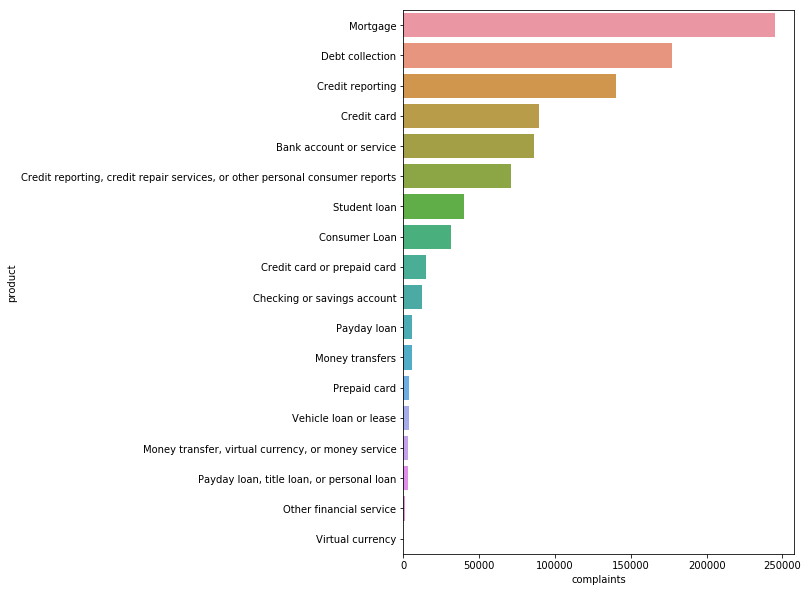

In [11]:
plt.figure(figsize=(7, 10))
sns.barplot(x='complaints', y='product', data=products)

In [63]:
mortgages = complaints_df[complaints_df.Product == 'Mortgage']